### TOP 

# More cleaning, scaling (adding weights), pca and running k-means clustering models and assigning labels 


In [1]:
# Run models 2 

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [3]:
df=pd.read_csv('masterdata.csv')

In [4]:
len(df)

8469

In [23]:
df.head(30)

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C
5,5,Grayson Allen,111,2018-19,95.0,24.4,-0.5,0.0,7.5,10.0,...,5.4,24.3,0.376,0.443,0.323,0.466,0.750,0.516,2018,SG
6,6,Jarrett Allen,106,2018-19,123.0,15.9,2.4,7.6,18.5,11.0,...,4.2,19.8,0.590,0.629,0.133,0.595,0.709,0.632,2018,C
7,7,Kadeem Allen,114,2018-19,116.0,19.6,0.1,1.0,16.2,12.0,...,5.3,21.9,0.461,0.457,0.472,0.521,0.778,0.574,2018,SG
8,8,Al-Farouq Aminu,109,2018-19,118.0,13.7,1.7,5.8,13.2,13.0,...,3.0,16.1,0.433,0.514,0.343,0.514,0.867,0.568,2018,PF
9,9,Justin Anderson,113,2018-19,103.0,17.2,-0.1,0.4,11.2,14.0,...,4.8,17.8,0.408,0.500,0.312,0.484,0.743,0.516,2018,SF


In [6]:
df.columns

Index(['Unnamed: 0', 'Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS',
       'PER', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%',
       'Year', 'Pos'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0      0
Player          0
DRtg            0
Season          0
ORtg            0
USG%            0
VORP            0
WS              0
PER             0
Rk              0
Age             0
Tm              0
Lg              0
G               0
GS              0
MP              0
FG              0
FGA             0
2P              0
2PA             0
3P              0
3PA             0
FT              0
FTA             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
FG%             0
2P%             0
3P%             0
eFG%            0
FT%             0
TS%             0
Year            0
Pos           144
dtype: int64

### Missing some Player Positions , will explore and fill in missing position information 

In [9]:
df[df['Pos'].isnull()]

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
22,22,Mohamed Bamba,103,2018-19,105.0,17.8,0.4,1.7,14.9,31.0,...,6.5,18.7,0.481,0.555,0.300,0.525,0.587,0.539,2018,NaN
2379,2379,Ray Allen,109,2013-14,111.0,16.8,1.0,4.1,12.8,2533.0,...,3.1,19.1,0.442,0.530,0.375,0.549,0.905,0.590,2013,NaN
2803,2803,Ray Allen,107,2012-13,112.0,19.3,1.1,5.4,14.7,3014.0,...,3.4,22.5,0.449,0.480,0.419,0.555,0.886,0.599,2012,NaN
2984,2984,Grant Hill,107,2012-13,83.0,14.0,-0.4,-0.1,4.8,3196.0,...,4.7,11.2,0.388,0.402,0.273,0.403,0.583,0.428,2012,NaN
3025,3025,Jason Kidd,103,2012-13,114.0,11.6,3.3,5.4,13.5,3250.0,...,3.3,12.0,0.372,0.452,0.351,0.511,0.833,0.532,2012,NaN
3092,3092,Steve Nash,111,2012-13,117.0,17.8,0.4,4.3,16.0,3320.0,...,2.2,19.9,0.497,0.519,0.438,0.557,0.922,0.605,2012,NaN
3234,3234,Ray Allen,101,2011-12,111.0,18.6,1.8,4.7,14.8,3483.0,...,2.8,22.2,0.458,0.463,0.453,0.566,0.915,0.607,2011,NaN
3400,3400,Grant Hill,107,2011-12,100.0,18.6,0.5,1.6,12.3,3684.0,...,3.3,18.8,0.446,0.470,0.264,0.461,0.761,0.500,2011,NaN
3441,3441,Jason Kidd,101,2011-12,103.0,12.7,1.5,3.0,13.1,3739.0,...,3.2,11.4,0.363,0.400,0.354,0.507,0.786,0.524,2011,NaN
3473,3473,Tracy McGrady,102,2011-12,102.0,18.0,0.1,1.6,13.6,3777.0,...,2.2,17.4,0.437,0.434,0.455,0.470,0.675,0.510,2011,NaN


In [10]:
df2=df

In [12]:
df[df['Pos'].isnull()]

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
22,22,Mohamed Bamba,103,2018-19,105.0,17.8,0.4,1.7,14.9,31.0,...,6.5,18.7,0.481,0.555,0.300,0.525,0.587,0.539,2018,NaN
2379,2379,Ray Allen,109,2013-14,111.0,16.8,1.0,4.1,12.8,2533.0,...,3.1,19.1,0.442,0.530,0.375,0.549,0.905,0.590,2013,NaN
2803,2803,Ray Allen,107,2012-13,112.0,19.3,1.1,5.4,14.7,3014.0,...,3.4,22.5,0.449,0.480,0.419,0.555,0.886,0.599,2012,NaN
2984,2984,Grant Hill,107,2012-13,83.0,14.0,-0.4,-0.1,4.8,3196.0,...,4.7,11.2,0.388,0.402,0.273,0.403,0.583,0.428,2012,NaN
3025,3025,Jason Kidd,103,2012-13,114.0,11.6,3.3,5.4,13.5,3250.0,...,3.3,12.0,0.372,0.452,0.351,0.511,0.833,0.532,2012,NaN
3092,3092,Steve Nash,111,2012-13,117.0,17.8,0.4,4.3,16.0,3320.0,...,2.2,19.9,0.497,0.519,0.438,0.557,0.922,0.605,2012,NaN
3234,3234,Ray Allen,101,2011-12,111.0,18.6,1.8,4.7,14.8,3483.0,...,2.8,22.2,0.458,0.463,0.453,0.566,0.915,0.607,2011,NaN
3400,3400,Grant Hill,107,2011-12,100.0,18.6,0.5,1.6,12.3,3684.0,...,3.3,18.8,0.446,0.470,0.264,0.461,0.761,0.500,2011,NaN
3441,3441,Jason Kidd,101,2011-12,103.0,12.7,1.5,3.0,13.1,3739.0,...,3.2,11.4,0.363,0.400,0.354,0.507,0.786,0.524,2011,NaN
3473,3473,Tracy McGrady,102,2011-12,102.0,18.0,0.1,1.6,13.6,3777.0,...,2.2,17.4,0.437,0.434,0.455,0.470,0.675,0.510,2011,NaN


In [15]:
df[df['Pos'].isnull()]

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
22,22,Mohamed Bamba,103,2018-19,105.0,17.8,0.4,1.7,14.9,31.0,...,6.5,18.7,0.481,0.555,0.300,0.525,0.587,0.539,2018,NaN
2379,2379,Ray Allen,109,2013-14,111.0,16.8,1.0,4.1,12.8,2533.0,...,3.1,19.1,0.442,0.530,0.375,0.549,0.905,0.590,2013,NaN
2803,2803,Ray Allen,107,2012-13,112.0,19.3,1.1,5.4,14.7,3014.0,...,3.4,22.5,0.449,0.480,0.419,0.555,0.886,0.599,2012,NaN
2984,2984,Grant Hill,107,2012-13,83.0,14.0,-0.4,-0.1,4.8,3196.0,...,4.7,11.2,0.388,0.402,0.273,0.403,0.583,0.428,2012,NaN
3025,3025,Jason Kidd,103,2012-13,114.0,11.6,3.3,5.4,13.5,3250.0,...,3.3,12.0,0.372,0.452,0.351,0.511,0.833,0.532,2012,NaN
3092,3092,Steve Nash,111,2012-13,117.0,17.8,0.4,4.3,16.0,3320.0,...,2.2,19.9,0.497,0.519,0.438,0.557,0.922,0.605,2012,NaN
3234,3234,Ray Allen,101,2011-12,111.0,18.6,1.8,4.7,14.8,3483.0,...,2.8,22.2,0.458,0.463,0.453,0.566,0.915,0.607,2011,NaN
3400,3400,Grant Hill,107,2011-12,100.0,18.6,0.5,1.6,12.3,3684.0,...,3.3,18.8,0.446,0.470,0.264,0.461,0.761,0.500,2011,NaN
3441,3441,Jason Kidd,101,2011-12,103.0,12.7,1.5,3.0,13.1,3739.0,...,3.2,11.4,0.363,0.400,0.354,0.507,0.786,0.524,2011,NaN
3473,3473,Tracy McGrady,102,2011-12,102.0,18.0,0.1,1.6,13.6,3777.0,...,2.2,17.4,0.437,0.434,0.455,0.470,0.675,0.510,2011,NaN


In [19]:
df.loc[df.Player=='Steve Nash', ["Pos"]] = 'PG'

In [20]:
df[df['Pos'].isnull()]

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
22,22,Mohamed Bamba,103,2018-19,105.0,17.8,0.4,1.7,14.9,31.0,...,6.5,18.7,0.481,0.555,0.300,0.525,0.587,0.539,2018,NaN
2379,2379,Ray Allen,109,2013-14,111.0,16.8,1.0,4.1,12.8,2533.0,...,3.1,19.1,0.442,0.530,0.375,0.549,0.905,0.590,2013,NaN
2803,2803,Ray Allen,107,2012-13,112.0,19.3,1.1,5.4,14.7,3014.0,...,3.4,22.5,0.449,0.480,0.419,0.555,0.886,0.599,2012,NaN
2984,2984,Grant Hill,107,2012-13,83.0,14.0,-0.4,-0.1,4.8,3196.0,...,4.7,11.2,0.388,0.402,0.273,0.403,0.583,0.428,2012,NaN
3025,3025,Jason Kidd,103,2012-13,114.0,11.6,3.3,5.4,13.5,3250.0,...,3.3,12.0,0.372,0.452,0.351,0.511,0.833,0.532,2012,NaN
3234,3234,Ray Allen,101,2011-12,111.0,18.6,1.8,4.7,14.8,3483.0,...,2.8,22.2,0.458,0.463,0.453,0.566,0.915,0.607,2011,NaN
3400,3400,Grant Hill,107,2011-12,100.0,18.6,0.5,1.6,12.3,3684.0,...,3.3,18.8,0.446,0.470,0.264,0.461,0.761,0.500,2011,NaN
3441,3441,Jason Kidd,101,2011-12,103.0,12.7,1.5,3.0,13.1,3739.0,...,3.2,11.4,0.363,0.400,0.354,0.507,0.786,0.524,2011,NaN
3473,3473,Tracy McGrady,102,2011-12,102.0,18.0,0.1,1.6,13.6,3777.0,...,2.2,17.4,0.437,0.434,0.455,0.470,0.675,0.510,2011,NaN
3624,3624,Ray Allen,104,2010-11,116.0,19.8,4.1,10.0,16.4,3962.0,...,2.7,24.3,0.491,0.520,0.444,0.577,0.881,0.615,2010,NaN


In [21]:
df.loc[df.Player=='Ray Allen', ["Pos"]] = 'SG'

In [22]:
df.loc[df.Player=='Jason Kidd', ["Pos"]] = 'PG'

In [24]:
df.loc[df.Player=='Grant Hill', ["Pos"]] = 'SF'

In [25]:
df.loc[df.Player=='Tracy McGrady', ["Pos"]] = 'SF'

In [26]:
df.loc[df.Player=="Shaquille O'Neal", ["Pos"]] = "C"

In [27]:
df.loc[df.Player=="Allen Iverson", ["Pos"]] = "PG"

In [28]:
df.loc[df.Player=="Karl Malone", ["Pos"]] = "PF"

In [29]:
df.loc[df.Player=="Reggie Miller", ["Pos"]] = "SG"

In [30]:
df.loc[df.Player=="Alonzo Mourning", ["Pos"]] = "C"

In [31]:
df.loc[df.Player=="Dikembe Mutombo", ["Pos"]] = "C"

In [32]:
df.loc[df.Player=="Hakeem Olajuwon", ["Pos"]] = "C"

In [33]:
df.loc[df.Player=="Gary Payton", ["Pos"]] = "PG"

In [34]:
df.loc[df.Player=="Scottie Pippen", ["Pos"]] = "SF"

In [35]:
df.loc[df.Player=="Mitch Richmond", ["Pos"]] = "SG"

In [36]:
df.loc[df.Player=="David Robinson", ["Pos"]] = "C"

In [38]:
df.loc[df.Player=="John Stockton", ["Pos"]] = "PG"

In [39]:
df.loc[df.Player=="Vlade Divac", ["Pos"]] = "C"

In [40]:
df.loc[df.Player=="Patrick Ewing", ["Pos"]] = "C"

In [41]:
df.loc[df.Player=="Arvydas Sabonis", ["Pos"]] = "C"

In [42]:
df.isnull().sum()

Unnamed: 0     0
Player         0
DRtg           0
Season         0
ORtg           0
USG%           0
VORP           0
WS             0
PER            0
Rk             0
Age            0
Tm             0
Lg             0
G              0
GS             0
MP             0
FG             0
FGA            0
2P             0
2PA            0
3P             0
3PA            0
FT             0
FTA            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
FG%            0
2P%            0
3P%            0
eFG%           0
FT%            0
TS%            0
Year           0
Pos           10
dtype: int64

In [43]:
df[df['Pos'].isnull()]

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
22,22,Mohamed Bamba,103,2018-19,105.0,17.8,0.4,1.7,14.9,31.0,...,6.5,18.7,0.481,0.555,0.300,0.525,0.587,0.539,2018,NaN
4815,4815,Yao Ming,101,2008-09,114.0,26.2,3.3,10.6,22.7,5130.0,...,5.3,31.1,0.548,0.548,1.000,0.549,0.866,0.618,2008,NaN
5237,5237,Yao Ming,99,2007-08,112.0,27.1,2.6,8.3,22.5,5573.0,...,4.4,31.4,0.507,0.508,0.000,0.507,0.850,0.587,2007,NaN
5894,5894,Yao Ming,98,2006-07,111.0,33.5,1.8,7.4,26.5,6026.0,...,5.2,39.2,0.516,0.518,0.000,0.516,0.862,0.601,2006,NaN
6266,6266,Yao Ming,100,2005-06,113.0,29.9,2.2,8.6,25.6,6481.0,...,5.5,35.6,0.519,0.519,0.000,0.519,0.853,0.592,2005,NaN
6700,6700,Yao Ming,99,2004-05,113.0,26.8,2.2,10.7,23.2,6947.0,...,6.6,32.4,0.552,0.552,0.000,0.552,0.783,0.614,2004,NaN
7137,7137,Yao Ming,97,2003-04,110.0,25.3,2.6,11.4,21.9,7399.0,...,5.5,29.1,0.522,0.523,0.000,0.522,0.809,0.586,2003,NaN
7496,7496,Michael Jordan,103,2002-03,101.0,28.7,2.3,6.2,19.3,7771.0,...,3.1,29.5,0.445,0.450,0.291,0.450,0.821,0.491,2002,NaN
7543,7543,Yao Ming,100,2002-03,111.0,22.1,2.4,8.7,20.6,7825.0,...,5.2,25.1,0.498,0.498,0.500,0.499,0.811,0.570,2002,NaN
7859,7859,Michael Jordan,105,2001-02,99.0,36.0,2.4,3.3,20.7,8208.0,...,3.1,35.7,0.416,0.426,0.189,0.420,0.790,0.468,2001,NaN


In [44]:
df.loc[df.Player=="Mohamed Bamba", ["Pos"]] = "C"

In [45]:
df.loc[df.Player=="Yao Ming", ["Pos"]] = "C"

In [46]:
df.loc[df.Player=="Michael Jordan", ["Pos"]] = "SG"

In [47]:
df.isnull().sum()

Unnamed: 0    0
Player        0
DRtg          0
Season        0
ORtg          0
USG%          0
VORP          0
WS            0
PER           0
Rk            0
Age           0
Tm            0
Lg            0
G             0
GS            0
MP            0
FG            0
FGA           0
2P            0
2PA           0
3P            0
3PA           0
FT            0
FTA           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
FG%           0
2P%           0
3P%           0
eFG%          0
FT%           0
TS%           0
Year          0
Pos           0
dtype: int64

### have final data after filling in missing positions 

In [48]:
df.to_csv('finalmasterdata.csv', index=False)

In [49]:
dftester=pd.read_csv('finalmasterdata.csv')

In [50]:
dftester.head()

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [51]:
df.head()

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [52]:
df.columns

Index(['Unnamed: 0', 'Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS',
       'PER', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%',
       'Year', 'Pos'],
      dtype='object')

## Next steps to take 

In [ ]:
# Drop columns 
# scale 
# PCA for convetional positions (just fovisuals )
# Run model test
# get simple visual of clusters (with pca for new cluster visuals) 
# look into features again (weigh them)
 
# then run models again


In [60]:
dfdropped = df.drop(['Unnamed: 0', 'Player','Season','Year','MP', 'Age','Tm','Lg','G','GS','Pos'], axis=1)

In [61]:
dfdropped.head()

,DRtg,ORtg,USG%,VORP,WS,PER,Rk,FG,FGA,2P,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,111,103.0,12.2,-0.2,0.6,6.3,1.0,4.4,12.5,1.2,...,0.5,1.1,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507
1,115,99.0,13.5,-0.3,0.1,7.6,3.0,4.1,11.9,1.4,...,0.5,3.0,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474
2,106,120.0,16.4,3.2,9.1,18.5,4.0,8.4,14.1,8.4,...,1.3,2.4,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591
3,104,120.0,15.8,2.4,6.8,17.9,5.0,7.2,12.4,7.1,...,1.7,3.1,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623
4,110,117.0,26.9,2.5,9.3,22.9,8.0,12.4,24.0,12.3,...,1.9,2.6,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576


In [62]:
dfdropped.columns

Index(['DRtg', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'Rk', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%'],
      dtype='object')

### Standard scaling data 

In [63]:
X=dfdropped

In [101]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
X_scaled.min()

-6.9718720925792415

#### PCA scaled data 

In [66]:
pca = PCA(n_components=8)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.8803810482843167


In [67]:
### Figure out silhoutte / modeling aspect 

In [68]:
test=X_pca

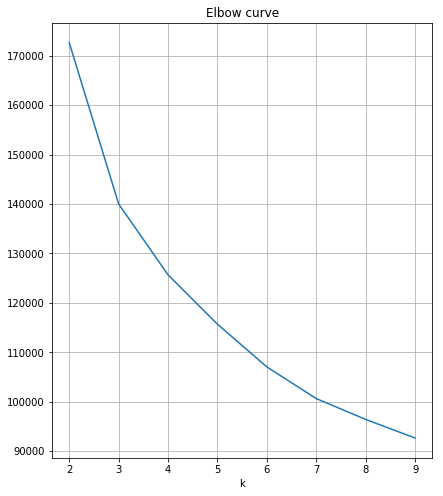

In [69]:
# Picking Best number of k part, using elbow method 
# Specifying the dataset and initializing variables
X = test
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

In [74]:
# Generate silhouette coefficient for each k
X = test
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

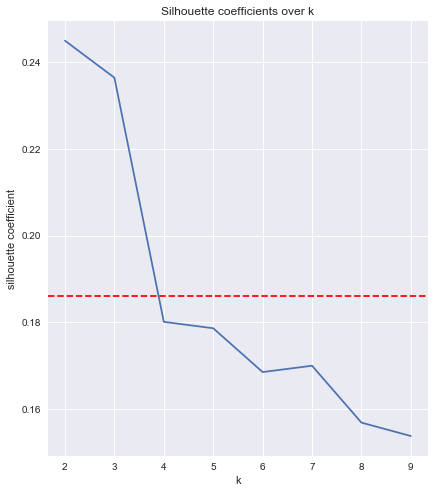

In [75]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [ ]:
# k = 7?

In [102]:
tester=X_scaled

## First clustering model ran with no feature engineering

#### Clustering test 1st cluster model

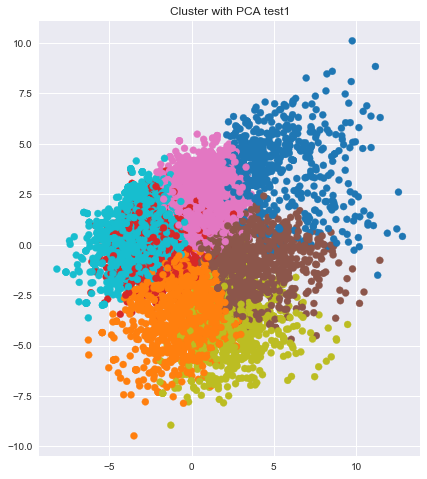

In [80]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=7, random_state=2).fit_predict(test)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster with PCA test1')
plt.scatter(test[:,0], test[:,1], c=km_neat, cmap=cmap)


In [79]:
from sklearn.metrics import silhouette_score

silhouette_score(test, km_neat)

0.16982246588225594

#### Run models for different eras 

In [ ]:
# Seperate 2000 to 2010 and 2011-2018 and run model without PCA  


In [111]:
dfmodern=df[df.Year > 2010]

In [114]:
dfmodern.tail()

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
3617,3617,Dorell Wright,109,2011-12,111.0,17.3,1.2,3.4,15.0,3950.0,...,3.1,19.8,0.422,0.500,0.360,0.522,0.816,0.553,2011,SF
3618,3618,Nick Young,110,2011-12,102.0,24.5,-0.6,1.9,12.9,3951.0,...,4.3,26.7,0.403,0.424,0.365,0.469,0.852,0.512,2011,SG
3619,3619,Nick Young,110,2011-12,102.0,24.5,-0.6,1.9,12.9,3951.0,...,4.3,26.7,0.403,0.424,0.365,0.469,0.852,0.512,2011,SG
3620,3620,Nick Young,110,2011-12,102.0,24.5,-0.6,1.9,12.9,3951.0,...,4.3,26.7,0.403,0.424,0.365,0.469,0.852,0.512,2011,SG
3621,3621,Thaddeus Young,100,2011-12,111.0,21.5,1.6,6.3,18.9,3953.0,...,3.9,24.6,0.507,0.508,0.250,0.507,0.771,0.538,2011,PF


In [113]:
df.head()

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [115]:
dfmod = dfmodern.drop(['Unnamed: 0', 'Player','Season','Year','MP', 'Age','Tm','Lg','G','GS','Pos'], axis=1)

In [116]:
dfmod.head()

,DRtg,ORtg,USG%,VORP,WS,PER,Rk,FG,FGA,2P,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,111,103.0,12.2,-0.2,0.6,6.3,1.0,4.4,12.5,1.2,...,0.5,1.1,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507
1,115,99.0,13.5,-0.3,0.1,7.6,3.0,4.1,11.9,1.4,...,0.5,3.0,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474
2,106,120.0,16.4,3.2,9.1,18.5,4.0,8.4,14.1,8.4,...,1.3,2.4,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591
3,104,120.0,15.8,2.4,6.8,17.9,5.0,7.2,12.4,7.1,...,1.7,3.1,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623
4,110,117.0,26.9,2.5,9.3,22.9,8.0,12.4,24.0,12.3,...,1.9,2.6,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576


In [943]:
len(dfmod)

3622

#### Bookmark

In [118]:
X=dfmod

In [119]:
#Scale modern 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [123]:
test=X_scaled

In [ ]:
# 3 or 7...

In [125]:
# Generate silhouette coefficient for each k
X = test
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

In [139]:
silhouette_score(test, km_neat9)

0.20471445885529752

#### PCA  for modern era 

In [135]:
pca = PCA(n_components=8)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.883008607102004


In [ ]:
#Predict K-Means cluster membership
km_neat9 = KMeans(n_clusters=3, random_state=2).fit_predict(test)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster for modern era')
plt.scatter(test[:,0], test[:,1], c=km_neat9, cmap=cmap)


In [140]:
test=X_pca

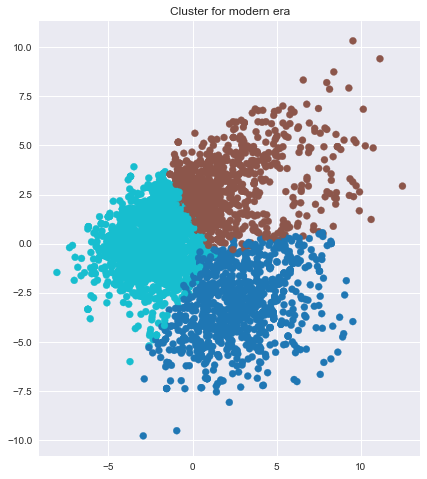

In [141]:
#Predict K-Means cluster membership
km_neat9 = KMeans(n_clusters=3, random_state=2).fit_predict(test)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster for modern era with PCA')
plt.scatter(test[:,0], test[:,1], c=km_neat9, cmap=cmap)

In [142]:
#pca makes clusters more organized 

In [143]:
silhouette_score(test, km_neat9)

0.23631965655387782

In [ ]:
# Should look into columns now and also 

#### Different silhouette scores for scaled data without PCA 

In [153]:
#Different silhouette scores for scaled data without PCA 
x = X_scaled
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24654690660568815
For n_clusters = 3, silhouette score is 0.20471445885529752
For n_clusters = 4, silhouette score is 0.15124475727988018
For n_clusters = 5, silhouette score is 0.14397897526497583
For n_clusters = 6, silhouette score is 0.13761046799308668
For n_clusters = 7, silhouette score is 0.14028136398430302
For n_clusters = 8, silhouette score is 0.12312474566866763
For n_clusters = 9, silhouette score is 0.12164712096690691
For n_clusters = 10, silhouette score is 0.11602417198851867
For n_clusters = 11, silhouette score is 0.1151348723672226
For n_clusters = 12, silhouette score is 0.11083439701941986
For n_clusters = 13, silhouette score is 0.10569313036334116
For n_clusters = 14, silhouette score is 0.10224388243097667
For n_clusters = 15, silhouette score is 0.10132984521910386
For n_clusters = 16, silhouette score is 0.10188532372216369
For n_clusters = 17, silhouette score is 0.10107897387029299
For n_clusters = 18, silhouette s

#### Different silhouette scores for Pca data 


### wherexis 2 

In [154]:
# Different silhoutte scores for Pca data 
x = X_pca
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2719851801948902
For n_clusters = 3, silhouette score is 0.23631965655387782
For n_clusters = 4, silhouette score is 0.1825903046727754
For n_clusters = 5, silhouette score is 0.17243948262125253
For n_clusters = 6, silhouette score is 0.16722879070325902
For n_clusters = 7, silhouette score is 0.17002842629210047
For n_clusters = 8, silhouette score is 0.15318349650550322
For n_clusters = 9, silhouette score is 0.14785521991410758
For n_clusters = 10, silhouette score is 0.14850789947735302
For n_clusters = 11, silhouette score is 0.1416922722277161
For n_clusters = 12, silhouette score is 0.14010193575608773
For n_clusters = 13, silhouette score is 0.13577066075709232
For n_clusters = 14, silhouette score is 0.133833123589637
For n_clusters = 15, silhouette score is 0.12882199320906046
For n_clusters = 16, silhouette score is 0.12983993092852705
For n_clusters = 17, silhouette score is 0.12954326004394973
For n_clusters = 18, silhouette score

Text(0.5, 0.98, 'Finding the right number of clusters')

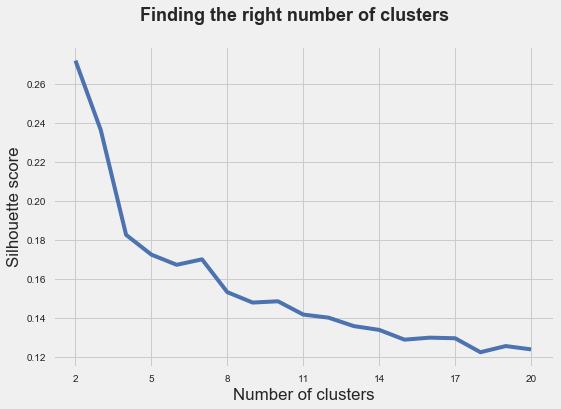

In [224]:
plt.style.use('seaborn-deep')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2, 21), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 21, 3.0))

silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)





In [158]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.048990106617005535
For n_cluster = 4, percent improvement = -0.07035581358379317
For n_cluster = 5, percent improvement = -0.012418279486468897
For n_cluster = 6, percent improvement = -0.006296448185442838
For n_cluster = 7, percent improvement = 0.003361830425436585
For n_cluster = 8, percent improvement = -0.020295791229743454
For n_cluster = 9, percent improvement = -0.006292126534388265
For n_cluster = 10, percent improvement = 0.0007659256719024787
For n_cluster = 11, percent improvement = -0.008004334092416743
For n_cluster = 12, percent improvement = -0.0018528744646817419
For n_cluster = 13, percent improvement = -0.005036963308905573
For n_cluster = 14, percent improvement = -0.0022419247756071403
For n_cluster = 15, percent improvement = -0.0057854098523648645
For n_cluster = 16, percent improvement = 0.0011684612232307767
For n_cluster = 17, percent improvement = -0.00034093828839321105
For n_cluster = 18, percent improvement = -0

Text(0.5, 0.98, 'Finding the right number of clusters')

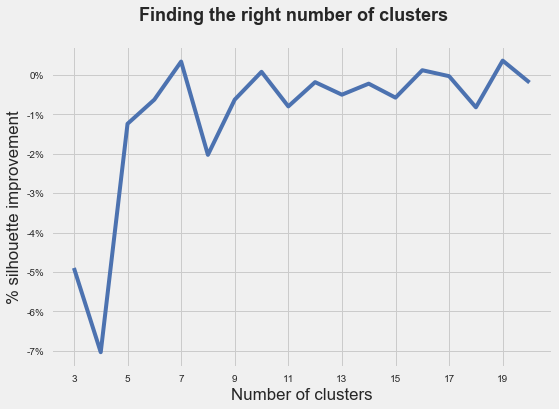

In [223]:
plt.style.use('seaborn-deep')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)


In [162]:
kmeans = KMeans(n_clusters = 7, random_state = 1)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [ ]:
dfdropped = df.drop(['Unnamed: 0', 'Player','Season','Year','MP', 'Age','Tm','Lg','G','GS','Pos'], axis=1)

In [166]:
df2=df.drop(['Unnamed: 0'], axis=1)

#### MVPRN

In [ ]:
# order messed up, shoudl be PCA part first but works 

In [168]:
pca_list = []

for n_components in range(2, 11):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(X_scaled)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.5464103402143003
For n_components = 3, explained variance ratio is 0.682273900901137
For n_components = 4, explained variance ratio is 0.7456181493873254
For n_components = 5, explained variance ratio is 0.7901667126840423
For n_components = 6, explained variance ratio is 0.8248315530213526
For n_components = 7, explained variance ratio is 0.855876220914702
For n_components = 8, explained variance ratio is 0.8830086071020025
For n_components = 9, explained variance ratio is 0.9060120415567564
For n_components = 10, explained variance ratio is 0.9252053298270849


In [170]:
from numpy import diff

dx = 1
y = pca_list
dy = diff(y)/dx
print(dy)

[0.13586356 0.06334425 0.04454856 0.03466484 0.03104467 0.02713239
 0.02300343 0.01919329]


In [187]:
df_cluster.columns

Index(['Player'], dtype='object')

In [189]:
len(y_kmeans)

3622

In [195]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfmod2['Player']
df_cluster['Cluster'] = y_kmeans

df_cluster.head(25)

,Player,Cluster
0,Álex Abrines,5
1,Jaylen Adams,1
2,Steven Adams,0
3,Bam Adebayo,0
4,LaMarcus Aldridge,6
5,Grayson Allen,3
6,Jarrett Allen,0
7,Kadeem Allen,3
8,Al-Farouq Aminu,5
9,Justin Anderson,5


In [180]:
df2=df2.reset_index()

In [182]:
df2.head()

,index,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [183]:
df2.columns

Index(['index', 'Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS',
       'PER', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%',
       'Year', 'Pos'],
      dtype='object')

In [184]:
df3=df2.drop(['index'], axis=1)

In [185]:
df3.head()

,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,Age,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,25.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,22.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,25.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,21.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,33.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [190]:
len(dfmodern)

3622

In [191]:
dfmodern.columns

Index(['Unnamed: 0', 'Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS',
       'PER', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%',
       'Year', 'Pos'],
      dtype='object')

# create function to get average stats of new clusters

In [981]:
dfmod2.to_csv('dfmodd2.csv', index=False)

In [193]:
dfmod2=dfmodern.drop(['Unnamed: 0'], axis=1)

In [199]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%']

def cluster_stats(cluster):
    
    print(dfmod2[interest_stats].loc[df_cluster['Cluster'] == cluster].mean())

In [197]:
df_cluster[df_cluster['Cluster'] == 1]

,Player,Cluster
1,Jaylen Adams,1
21,Lonzo Ball,1
28,Keita Bates-Diop,1
30,Jerryd Bayless,1
37,DeAndre' Bembry,1
51,Avery Bradley,1
52,Avery Bradley,1
53,Avery Bradley,1
59,Isaiah Briscoe,1
62,Bruce Brown,1


#### check count too of each cluster....

In [398]:
df_cluster['Cluster'].nunique()

7

In [399]:
df_cluster['Cluster'].value_counts()

5    861
3    824
1    676
4    374
6    343
0    322
2    222
Name: Cluster, dtype: int64

In [ ]:
#want less in 2 by getting out the PG's 

In [219]:
dfmod2.columns

Index(['Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'Rk',
       'Age', 'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'Year', 'Pos'],
      dtype='object')

### where x is x

In [ ]:
x = X_pca
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [228]:
x2 = X_scaled
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x2)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x2, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24654690660568815
For n_clusters = 3, silhouette score is 0.20471445885529752
For n_clusters = 4, silhouette score is 0.15124475727988018
For n_clusters = 5, silhouette score is 0.14397897526497583
For n_clusters = 6, silhouette score is 0.13761046799308668
For n_clusters = 7, silhouette score is 0.14028136398430302
For n_clusters = 8, silhouette score is 0.12312474566866763
For n_clusters = 9, silhouette score is 0.12164712096690691
For n_clusters = 10, silhouette score is 0.11602417198851867
For n_clusters = 11, silhouette score is 0.1151348723672226
For n_clusters = 12, silhouette score is 0.11083439701941986
For n_clusters = 13, silhouette score is 0.10569313036334116
For n_clusters = 14, silhouette score is 0.10224388243097667
For n_clusters = 15, silhouette score is 0.10132984521910386
For n_clusters = 16, silhouette score is 0.10188532372216369
For n_clusters = 17, silhouette score is 0.10107897387029299
For n_clusters = 18, silhouette s

#### Going to give weights to scaled data

In [ ]:
# made mistake never dropped 'Rk' from dfmod earlier....

In [252]:
dfmod=dfmod.drop(['Rk'], axis=1)

In [253]:
len(dfmod.columns)

29

In [254]:
X=dfmod

In [255]:
#Scale modern 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [ ]:
#test=X_scaled

In [245]:
x2test=pd.DataFrame(x2)

In [246]:
len(x2test.columns)

30

In [256]:
x2 = X_scaled
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x2)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x2, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2545795097906365
For n_clusters = 3, silhouette score is 0.2150324159986438
For n_clusters = 4, silhouette score is 0.15817056795285572
For n_clusters = 5, silhouette score is 0.14745465521023549
For n_clusters = 6, silhouette score is 0.14383952236371586
For n_clusters = 7, silhouette score is 0.14711271559400665
For n_clusters = 8, silhouette score is 0.12718865118374886
For n_clusters = 9, silhouette score is 0.12715332227585513
For n_clusters = 10, silhouette score is 0.11698248398966388
For n_clusters = 11, silhouette score is 0.11816739743267553
For n_clusters = 12, silhouette score is 0.11467119968871645
For n_clusters = 13, silhouette score is 0.11324810052266572
For n_clusters = 14, silhouette score is 0.10925783643184524
For n_clusters = 15, silhouette score is 0.1053114859090136
For n_clusters = 16, silhouette score is 0.10334286119278503
For n_clusters = 17, silhouette score is 0.10045124785045201
For n_clusters = 18, silhouette sco

In [ ]:
# 7 is still ideal clusters, but silhouette score did get better 

In [229]:
type(X_scaled)

numpy.ndarray

In [257]:
X_scaled2=pd.DataFrame(X_scaled)

In [258]:
X_scaled2.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,...,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03,3.622000e+03
mean,4.317793e-15,-1.231636e-15,-4.238588e-16,-3.049895e-17,9.808707e-18,-5.270954e-16,2.448498e-16,3.761639e-16,-4.622353e-17,-4.935006e-17,...,-4.610552e-16,5.468354e-17,-1.369541e-16,-8.711358e-17,1.569393e-17,-1.039493e-15,2.146865e-15,1.374020e-15,1.350138e-15,5.325649e-16
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,...,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00
min,-4.297964e+00,-3.405073e+00,-3.129010e+00,-2.144361e+00,-1.904901e+00,-2.382451e+00,-3.074396e+00,-3.333105e+00,-2.218706e+00,-2.360676e+00,...,-1.087045e+00,-2.372435e+00,-2.247416e+00,-3.029397e+00,-2.710553e+00,-4.582755e+00,-2.039289e+00,-3.383834e+00,-6.804548e+00,-3.414828e+00
25%,-6.578701e-01,-6.266009e-01,-7.413391e-01,-5.942191e-01,-6.827844e-01,-6.877900e-01,-7.355930e-01,-6.789194e-01,-7.428586e-01,-7.113034e-01,...,-6.542105e-01,-7.859022e-01,-7.347536e-01,-7.169750e-01,-6.468113e-01,-6.245078e-01,-1.498303e-01,-6.528169e-01,-5.160849e-01,-6.342246e-01
50%,7.014869e-02,-4.775259e-02,-1.087082e-01,-2.989540e-01,-2.383785e-01,-1.074265e-01,-8.072810e-02,-8.910043e-02,-1.279222e-01,-1.036400e-01,...,-3.295849e-01,-9.179399e-02,-1.585012e-01,-1.003293e-01,-1.631217e-01,-8.696806e-02,3.172271e-01,-5.660900e-02,1.947849e-01,1.055307e-02
75%,7.981674e-01,6.468654e-01,6.463673e-01,3.653927e-01,4.282305e-01,5.657951e-01,6.676890e-01,6.822014e-01,6.509973e-01,6.342370e-01,...,3.196663e-01,6.023142e-01,5.618142e-01,6.019617e-01,4.817977e-01,5.808844e-01,5.861388e-01,5.924883e-01,7.051529e-01,6.150321e-01
max,3.224897e+00,3.888416e+00,4.625819e+00,8.632818e+00,6.020339e+00,4.094405e+00,3.193597e+00,3.880835e+00,3.438709e+00,3.607447e+00,...,6.379344e+00,4.866122e+00,4.451518e+00,4.798578e+00,4.609282e+00,4.066748e+00,5.037337e+00,4.501496e+00,2.309167e+00,3.919518e+00


In [259]:
X_scaled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 29 columns):
0     3622 non-null float64
1     3622 non-null float64
2     3622 non-null float64
3     3622 non-null float64
4     3622 non-null float64
5     3622 non-null float64
6     3622 non-null float64
7     3622 non-null float64
8     3622 non-null float64
9     3622 non-null float64
10    3622 non-null float64
11    3622 non-null float64
12    3622 non-null float64
13    3622 non-null float64
14    3622 non-null float64
15    3622 non-null float64
16    3622 non-null float64
17    3622 non-null float64
18    3622 non-null float64
19    3622 non-null float64
20    3622 non-null float64
21    3622 non-null float64
22    3622 non-null float64
23    3622 non-null float64
24    3622 non-null float64
25    3622 non-null float64
26    3622 non-null float64
27    3622 non-null float64
28    3622 non-null float64
dtypes: float64(29)
memory usage: 820.7 KB


In [263]:
X_scaled.max()

8.632817899319218

In [264]:
X_scaled.min()

-6.80454827213045

In [236]:
len(dfmod.columns)

30

In [237]:
dfmod.columns

Index(['DRtg', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'Rk', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%'],
      dtype='object')

In [260]:
dfmod.tail()

,DRtg,ORtg,USG%,VORP,WS,PER,FG,FGA,2P,2PA,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
3617,109,111.0,17.3,1.2,3.4,15.0,7.0,16.6,3.7,7.4,...,0.8,1.6,3.1,19.8,0.422,0.500,0.360,0.522,0.816,0.553
3618,110,102.0,24.5,-0.6,1.9,12.9,9.6,23.8,6.5,15.2,...,0.5,2.5,4.3,26.7,0.403,0.424,0.365,0.469,0.852,0.512
3619,110,102.0,24.5,-0.6,1.9,12.9,9.6,23.8,6.5,15.2,...,0.5,2.5,4.3,26.7,0.403,0.424,0.365,0.469,0.852,0.512
3620,110,102.0,24.5,-0.6,1.9,12.9,9.6,23.8,6.5,15.2,...,0.5,2.5,4.3,26.7,0.403,0.424,0.365,0.469,0.852,0.512
3621,100,111.0,21.5,1.6,6.3,18.9,10.6,21.0,10.6,20.8,...,1.3,1.7,3.9,24.6,0.507,0.508,0.250,0.507,0.771,0.538


#### Ending

### Modified models 

In [ ]:
# going to drop certain columns
# weigh them possibly and then run models 


In [274]:
dfmod.columns

Index(['DRtg', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'FG', 'FGA', '2P', '2PA',
       '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%'],
      dtype='object')

In [289]:
dfMW=dfmod.drop(['VORP', 'FG','2P','3P','FT','ORB','DRtg','ORtg'], axis=1)

In [290]:
len(dfMW.columns)

21

In [ ]:
#Scaling then weighing...


In [501]:
X2=dfMW

In [502]:
#Scale modified (didnt weight yet) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

In [503]:
x3 = X_scaled
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x3)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x3, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2543575090995315
For n_clusters = 3, silhouette score is 0.20490411824405946
For n_clusters = 4, silhouette score is 0.1493141393833894
For n_clusters = 5, silhouette score is 0.1448386430625929
For n_clusters = 6, silhouette score is 0.1429081342493841
For n_clusters = 7, silhouette score is 0.1483167874999981
For n_clusters = 8, silhouette score is 0.13023017831462086
For n_clusters = 9, silhouette score is 0.1268774294118943
For n_clusters = 10, silhouette score is 0.12160116985007108
For n_clusters = 11, silhouette score is 0.11258513663468234
For n_clusters = 12, silhouette score is 0.1131074723838618
For n_clusters = 13, silhouette score is 0.11154069778177979
For n_clusters = 14, silhouette score is 0.10870211686580518
For n_clusters = 15, silhouette score is 0.10476799511117453
For n_clusters = 16, silhouette score is 0.11009368936781593
For n_clusters = 17, silhouette score is 0.10642246896964747
For n_clusters = 18, silhouette score i

#### x3checkpt

In [485]:
x3test=pd.DataFrame(x3)

In [472]:
x3test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.394377,-0.904987,-1.778873,-0.996514,-2.056844,1.440821,-1.468571,-1.218426,-1.232082,-1.005010,...,-0.546002,-1.678327,-0.158501,-1.213717,-1.501330,0.222525,0.246461,-0.287399,1.607411,-0.573777
1,-1.129081,-1.090157,-1.477084,-1.132626,-1.731310,0.845873,-1.468571,-0.516479,-0.583204,0.893280,...,-0.546002,0.205681,0.345720,-1.453524,-1.694805,-2.041658,0.352610,-0.825909,0.285922,-1.238704
2,-0.537265,2.242888,1.053300,-0.633549,0.482321,-1.420593,0.314195,-0.073145,1.051008,-0.794089,...,0.319666,-0.389269,-0.590690,-0.134587,2.335941,1.786277,-2.039289,1.789712,-2.247691,1.118765
3,-0.659709,1.391110,0.914013,-1.019200,0.026574,-1.307270,0.618570,1.589361,1.507626,0.084749,...,0.752500,0.304839,0.561814,-0.271620,2.029604,1.655964,-0.623964,1.481992,-0.105968,1.763542
4,1.605517,2.316956,2.074740,1.612301,2.457227,-1.193947,1.357765,0.850469,1.099074,-0.337093,...,0.968918,-0.190952,-0.806785,1.920898,1.110594,0.678619,-0.355052,0.385739,0.914768,0.816525


In [294]:
dfMW.head()

,USG%,WS,PER,FGA,2PA,3PA,FTA,DRB,TRB,AST,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,12.2,0.6,6.3,12.5,2.4,10.1,1.0,3.4,3.8,1.6,...,0.5,1.1,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507
1,13.5,0.1,7.6,11.9,3.9,8.0,1.0,5.3,6.5,7.0,...,0.5,3.0,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474
2,16.4,9.1,18.5,14.1,14.1,0.0,5.1,6.5,13.3,2.2,...,1.3,2.4,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591
3,15.8,6.8,17.9,12.4,12.0,0.4,5.8,11.0,15.2,4.7,...,1.7,3.1,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623
4,26.9,9.3,22.9,24.0,23.2,0.8,7.5,9.0,13.5,3.5,...,1.9,2.6,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576


In [313]:
dfMW.columns

Index(['USG%', 'WS', 'PER', 'FGA', '2PA', '3PA', 'FTA', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%'],
      dtype='object')

In [ ]:
# Dropping columns made slight difference going to weight and then run next to see results. 

In [ ]:
# Going to check if scaled column number aligns with original dataframe column name 

In [302]:
dfMW2=dfMW[['USG%','WS']]

In [303]:
dfMW2.head()

,USG%,WS
0,12.2,0.6
1,13.5,0.1
2,16.4,9.1
3,15.8,6.8
4,26.9,9.3


In [304]:
X2check=dfMW2

In [305]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2check)

In [306]:
x4=X_scaled

In [309]:
x4=pd.DataFrame(x4)

In [310]:
x4.head()

,0,1
0,-1.394377,-0.904987
1,-1.129081,-1.090157
2,-0.537265,2.242888
3,-0.659709,1.391110
4,1.605517,2.316956


In [311]:
dfMW2.head()

,USG%,WS
0,12.2,0.6
1,13.5,0.1
2,16.4,9.1
3,15.8,6.8
4,26.9,9.3


In [312]:
# makes sense, col for scaled and dataframe to matchup. so can weigh now... 

In [ ]:
#plan
# after scaling, then make into dataframe then multiply, then back to numpy then run into kmeans


In [319]:
x4weight=x4[[0,1]].mul(3) 

In [320]:
x4weight.head()

,0,1
0,-4.183132,-2.714962
1,-3.387242,-3.270470
2,-1.611794,6.728665
3,-1.979128,4.173330
4,4.816552,6.950868


In [321]:
x3test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.394377,-0.904987,-1.778873,-0.996514,-2.056844,1.440821,-1.468571,-1.218426,-1.232082,-1.005010,...,-0.546002,-1.678327,-0.158501,-1.213717,-1.501330,0.222525,0.246461,-0.287399,1.607411,-0.573777
1,-1.129081,-1.090157,-1.477084,-1.132626,-1.731310,0.845873,-1.468571,-0.516479,-0.583204,0.893280,...,-0.546002,0.205681,0.345720,-1.453524,-1.694805,-2.041658,0.352610,-0.825909,0.285922,-1.238704
2,-0.537265,2.242888,1.053300,-0.633549,0.482321,-1.420593,0.314195,-0.073145,1.051008,-0.794089,...,0.319666,-0.389269,-0.590690,-0.134587,2.335941,1.786277,-2.039289,1.789712,-2.247691,1.118765
3,-0.659709,1.391110,0.914013,-1.019200,0.026574,-1.307270,0.618570,1.589361,1.507626,0.084749,...,0.752500,0.304839,0.561814,-0.271620,2.029604,1.655964,-0.623964,1.481992,-0.105968,1.763542
4,1.605517,2.316956,2.074740,1.612301,2.457227,-1.193947,1.357765,0.850469,1.099074,-0.337093,...,0.968918,-0.190952,-0.806785,1.920898,1.110594,0.678619,-0.355052,0.385739,0.914768,0.816525


In [322]:
dfMW.head()

,USG%,WS,PER,FGA,2PA,3PA,FTA,DRB,TRB,AST,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,12.2,0.6,6.3,12.5,2.4,10.1,1.0,3.4,3.8,1.6,...,0.5,1.1,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507
1,13.5,0.1,7.6,11.9,3.9,8.0,1.0,5.3,6.5,7.0,...,0.5,3.0,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474
2,16.4,9.1,18.5,14.1,14.1,0.0,5.1,6.5,13.3,2.2,...,1.3,2.4,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591
3,15.8,6.8,17.9,12.4,12.0,0.4,5.8,11.0,15.2,4.7,...,1.7,3.1,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623
4,26.9,9.3,22.9,24.0,23.2,0.8,7.5,9.0,13.5,3.5,...,1.9,2.6,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576


In [323]:
dfMW.columns

Index(['USG%', 'WS', 'PER', 'FGA', '2PA', '3PA', 'FTA', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%'],
      dtype='object')

In [325]:
len(dfMW.columns)

21

In [327]:
len(x3test.columns)

21

In [377]:
x8test=x3test

#### checking

In [379]:
x3test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.394377,-0.904987,-1.778873,-0.996514,-2.056844,1.440821,-1.468571,-1.218426,-1.232082,-1.005010,...,-0.546002,-1.678327,-0.158501,-1.213717,-1.501330,0.222525,0.246461,-0.287399,1.607411,-0.573777
1,-1.129081,-1.090157,-1.477084,-1.132626,-1.731310,0.845873,-1.468571,-0.516479,-0.583204,0.893280,...,-0.546002,0.205681,0.345720,-1.453524,-1.694805,-2.041658,0.352610,-0.825909,0.285922,-1.238704
2,-0.537265,2.242888,1.053300,-0.633549,0.482321,-1.420593,0.314195,-0.073145,1.051008,-0.794089,...,0.319666,-0.389269,-0.590690,-0.134587,2.335941,1.786277,-2.039289,1.789712,-2.247691,1.118765
3,-0.659709,1.391110,0.914013,-1.019200,0.026574,-1.307270,0.618570,1.589361,1.507626,0.084749,...,0.752500,0.304839,0.561814,-0.271620,2.029604,1.655964,-0.623964,1.481992,-0.105968,1.763542
4,1.605517,2.316956,2.074740,1.612301,2.457227,-1.193947,1.357765,0.850469,1.099074,-0.337093,...,0.968918,-0.190952,-0.806785,1.920898,1.110594,0.678619,-0.355052,0.385739,0.914768,0.816525


### astTOV weight

In [504]:
x3test[9]=x3test[9]*3

In [390]:
x3test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.394377,-0.904987,-1.778873,-0.996514,-2.056844,1.440821,-1.468571,-1.218426,-1.232082,-3.015030,...,-0.546002,-1.678327,-0.158501,-1.213717,-1.501330,0.222525,0.246461,-0.287399,1.607411,-0.573777
1,-1.129081,-1.090157,-1.477084,-1.132626,-1.731310,0.845873,-1.468571,-0.516479,-0.583204,2.679839,...,-0.546002,0.205681,0.345720,-1.453524,-1.694805,-2.041658,0.352610,-0.825909,0.285922,-1.238704
2,-0.537265,2.242888,1.053300,-0.633549,0.482321,-1.420593,0.314195,-0.073145,1.051008,-2.382267,...,0.319666,-0.389269,-0.590690,-0.134587,2.335941,1.786277,-2.039289,1.789712,-2.247691,1.118765
3,-0.659709,1.391110,0.914013,-1.019200,0.026574,-1.307270,0.618570,1.589361,1.507626,0.254247,...,0.752500,0.304839,0.561814,-0.271620,2.029604,1.655964,-0.623964,1.481992,-0.105968,1.763542
4,1.605517,2.316956,2.074740,1.612301,2.457227,-1.193947,1.357765,0.850469,1.099074,-1.011280,...,0.968918,-0.190952,-0.806785,1.920898,1.110594,0.678619,-0.355052,0.385739,0.914768,0.816525


In [505]:
x3test[12]=x3test[12]*3

In [392]:
x3test.to_numpy()

array([[-1.39437737, -0.90498743, -1.77887322, ..., -0.28739914,
         1.60741074, -0.5737767 ],
       [-1.12908057, -1.09015659, -1.47708423, ..., -0.82590947,
         0.28592205, -1.23870369],
       [-0.53726462,  2.2428883 ,  1.05330035, ...,  1.78971212,
        -2.24769074,  1.11876471],
       ...,
       [ 1.11573854, -0.42354762, -0.24671375, ..., -0.63358435,
         0.96033697, -0.47303019],
       [ 1.11573854, -0.42354762, -0.24671375, ..., -0.63358435,
         0.96033697, -0.47303019],
       [ 0.50351515,  1.205941  ,  1.1461585 , ...,  0.09725109,
         0.22212605,  0.05085168]])

In [ ]:
#weights 9 and 12

In [393]:
x4 = x3test
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x4)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x4, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3029459055443465
For n_clusters = 3, silhouette score is 0.24005779545459774
For n_clusters = 4, silhouette score is 0.19625793430667213
For n_clusters = 5, silhouette score is 0.20005244776554507
For n_clusters = 6, silhouette score is 0.15285377513588916
For n_clusters = 7, silhouette score is 0.15463199215045348
For n_clusters = 8, silhouette score is 0.14795156304386442
For n_clusters = 9, silhouette score is 0.14467208869222317
For n_clusters = 10, silhouette score is 0.13732454769424998
For n_clusters = 11, silhouette score is 0.13252943329134131
For n_clusters = 12, silhouette score is 0.12765255290526167
For n_clusters = 13, silhouette score is 0.1315348530469933
For n_clusters = 14, silhouette score is 0.1282010888545432
For n_clusters = 15, silhouette score is 0.12124347620036052
For n_clusters = 16, silhouette score is 0.12104013607759688
For n_clusters = 17, silhouette score is 0.11773075973364334
For n_clusters = 18, silhouette sco

In [394]:
#weighing Assist and Turnovers did make it better, should do for some others too

### Weighing Features

In [395]:
dfMW.columns

Index(['USG%', 'WS', 'PER', 'FGA', '2PA', '3PA', 'FTA', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%'],
      dtype='object')

In [396]:
len(dfMW.columns)

21

In [400]:
x3test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.394377,-0.904987,-1.778873,-0.996514,-2.056844,1.440821,-1.468571,-1.218426,-1.232082,-3.015030,...,-0.546002,-5.034981,-0.158501,-1.213717,-1.501330,0.222525,0.246461,-0.287399,1.607411,-0.573777
1,-1.129081,-1.090157,-1.477084,-1.132626,-1.731310,0.845873,-1.468571,-0.516479,-0.583204,2.679839,...,-0.546002,0.617043,0.345720,-1.453524,-1.694805,-2.041658,0.352610,-0.825909,0.285922,-1.238704
2,-0.537265,2.242888,1.053300,-0.633549,0.482321,-1.420593,0.314195,-0.073145,1.051008,-2.382267,...,0.319666,-1.167807,-0.590690,-0.134587,2.335941,1.786277,-2.039289,1.789712,-2.247691,1.118765
3,-0.659709,1.391110,0.914013,-1.019200,0.026574,-1.307270,0.618570,1.589361,1.507626,0.254247,...,0.752500,0.914518,0.561814,-0.271620,2.029604,1.655964,-0.623964,1.481992,-0.105968,1.763542
4,1.605517,2.316956,2.074740,1.612301,2.457227,-1.193947,1.357765,0.850469,1.099074,-1.011280,...,0.968918,-0.572857,-0.806785,1.920898,1.110594,0.678619,-0.355052,0.385739,0.914768,0.816525


In [ ]:
# make 2pts (mid-range) weighted differently? 
# first weigh less and then weight more(diff value than asst/tov) and see which creates most seperation 

#### checkpt5

In [514]:
# Run models more organized 

#### WEIGHT ALL FEATURES AND RUN MODEL 

In [ ]:
# for mid range .5 is better, now will do for all others
# 3pts into sep - 3PA 3P% [5] , [17]  
# rb's stls into sep - TRB DRB STL [7] [8] [10] 
# efficiency into sep - PER eFG% WS [1] [2] [18]

In [539]:
dfMW.columns

Index(['USG%', 'WS', 'PER', 'FGA', '2PA', '3PA', 'FTA', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%'],
      dtype='object')

In [540]:
len(dfMW.columns)

21

In [617]:
X2=dfMW

In [618]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

In [619]:
x3 = X_scaled
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x3)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x3, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2543575090995315
For n_clusters = 3, silhouette score is 0.20490411824405946
For n_clusters = 4, silhouette score is 0.1493141393833894
For n_clusters = 5, silhouette score is 0.1448386430625929
For n_clusters = 6, silhouette score is 0.1429081342493841
For n_clusters = 7, silhouette score is 0.1483167874999981
For n_clusters = 8, silhouette score is 0.13023017831462086
For n_clusters = 9, silhouette score is 0.1268774294118943
For n_clusters = 10, silhouette score is 0.12160116985007108
For n_clusters = 11, silhouette score is 0.11258513663468234
For n_clusters = 12, silhouette score is 0.1131074723838618
For n_clusters = 13, silhouette score is 0.11154069778177979
For n_clusters = 14, silhouette score is 0.10870211686580518
For n_clusters = 15, silhouette score is 0.10476799511117453
For n_clusters = 16, silhouette score is 0.11009368936781593
For n_clusters = 17, silhouette score is 0.10642246896964747
For n_clusters = 18, silhouette score i

In [621]:
x3test=pd.DataFrame(x3)

In [622]:
# AST 
x3test[9]=x3test[9]*3

In [623]:
# TOV 
x3test[12]=x3test[12]*3

In [624]:
# 2PA
x3test[4]=x3test[4]*.5

In [625]:
# 2P%
x3test[16]=x3test[16]*.5

In [626]:
# 3PA
x3test[5]=x3test[5]*10

In [627]:
# 3P%
x3test[17]=x3test[17]*10


In [628]:
# DRB 
x3test[7]=x3test[7]*.3

In [629]:
# TRB 
x3test[8]=x3test[8]*.3

In [630]:
# STL 
x3test[10]=x3test[10]*.8

In [631]:
# WS 
x3test[1]=x3test[1]*6

In [632]:
# PER
x3test[2]=x3test[2]*6

In [556]:
# # eFG%
# x3test[18]=x3test[18]*2

### MVP2

In [646]:
pca = PCA(n_components = 3)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3'])

pca_df['Player'] = df2['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3']]

In [662]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfmod2['Player']
df_cluster['Year'] = dfmod2['Year']
df_cluster['Cluster'] = y_kmeans

df_cluster.head(25)

,Player,Year,Cluster
0,Álex Abrines,2018,1
1,Jaylen Adams,2018,1
2,Steven Adams,2018,0
3,Bam Adebayo,2018,2
4,LaMarcus Aldridge,2018,2
5,Grayson Allen,2018,1
6,Jarrett Allen,2018,0
7,Kadeem Allen,2018,4
8,Al-Farouq Aminu,2018,4
9,Justin Anderson,2018,1


In [664]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%','PER']

def cluster_stats(cluster):
    
    print(dfmod2[interest_stats].loc[df_cluster['Cluster'] == cluster].mean())

## MVP3

In [744]:
X2=dfMW

In [745]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

In [746]:
x3 = X_scaled
silhouette = []

for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x3)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x3, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2543575090995315
For n_clusters = 3, silhouette score is 0.20490411824405946
For n_clusters = 4, silhouette score is 0.1493141393833894
For n_clusters = 5, silhouette score is 0.1448386430625929
For n_clusters = 6, silhouette score is 0.1429081342493841
For n_clusters = 7, silhouette score is 0.1483167874999981
For n_clusters = 8, silhouette score is 0.13023017831462086
For n_clusters = 9, silhouette score is 0.1268774294118943
For n_clusters = 10, silhouette score is 0.12160116985007108
For n_clusters = 11, silhouette score is 0.11258513663468234
For n_clusters = 12, silhouette score is 0.1131074723838618
For n_clusters = 13, silhouette score is 0.11154069778177979


In [747]:
x3test=pd.DataFrame(x3)

In [748]:
# AST 
x3test[9]=x3test[9]*2

In [749]:
# TOV 
x3test[12]=x3test[12]*2

In [750]:
# 2PA
x3test[4]=x3test[4]*.4

In [751]:
# 2P%
x3test[16]=x3test[16]*.4

In [752]:
# 3PA
x3test[5]=x3test[5]*8

In [753]:
# 3P%
x3test[17]=x3test[17]*8

In [754]:
# DRB 
x3test[7]=x3test[7]*.9

In [755]:
# TRB 
x3test[8]=x3test[8]*.9

In [756]:
# STL 
x3test[10]=x3test[10]*.8

In [757]:
# WS 
x3test[1]=x3test[1]*12

In [758]:
# PER
x3test[2]=x3test[2]*12

In [759]:
x10 = X_scaled
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x10)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x10, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3706593313125216
For n_clusters = 3, silhouette score is 0.3565601250280342
For n_clusters = 4, silhouette score is 0.3069048533822673
For n_clusters = 5, silhouette score is 0.24976004777157074
For n_clusters = 6, silhouette score is 0.2582107357322124
For n_clusters = 7, silhouette score is 0.26240492146453465
For n_clusters = 8, silhouette score is 0.24404952499857513
For n_clusters = 9, silhouette score is 0.221126641950394
For n_clusters = 10, silhouette score is 0.22769501112044205
For n_clusters = 11, silhouette score is 0.21826807100056614
For n_clusters = 12, silhouette score is 0.2131920735445063
For n_clusters = 13, silhouette score is 0.20329551118948627
For n_clusters = 14, silhouette score is 0.21090438590145802
For n_clusters = 15, silhouette score is 0.2083807940502671
For n_clusters = 16, silhouette score is 0.19854061205996407
For n_clusters = 17, silhouette score is 0.20803888654874253
For n_clusters = 18, silhouette score is

In [760]:
kmeans = KMeans(n_clusters = 7, random_state = 1)

kmeans.fit(x10)

y_kmeans = kmeans.predict(x10)

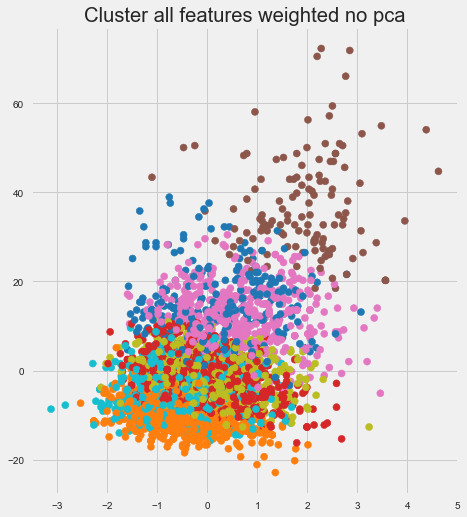

In [761]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster all features weighted no pca')
plt.scatter(x10[:,0], x10[:,1], c=y_kmeans, cmap=cmap)

In [762]:
pca = PCA(n_components=3)
pca.fit(x10)

X_pca = pca.transform(x10)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.9153115627790998


In [763]:
xpca12=X_pca

In [764]:
kmeans = KMeans(n_clusters = 7, random_state = 1)

kmeans.fit(xpca12)

y_kmeans = kmeans.predict(xpca12)

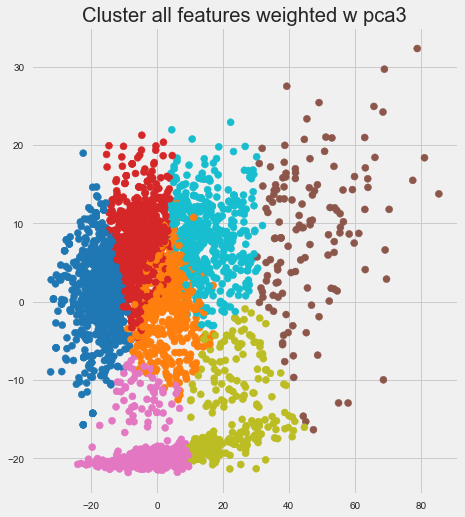

In [765]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster all features weighted w pca3')
plt.scatter(xpca12[:,0], xpca12[:,1], c=y_kmeans, cmap=cmap)

In [766]:
silhouette_score(xpca12, y_kmeans)

0.2979916356475417

In [767]:
pca_list = []

for n_components in range(2, 11):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(X_scaled)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.8453905840433643
For n_components = 3, explained variance ratio is 0.9153115627790984
For n_components = 4, explained variance ratio is 0.9689509469452962
For n_components = 5, explained variance ratio is 0.9838018181015232
For n_components = 6, explained variance ratio is 0.9881770414278809
For n_components = 7, explained variance ratio is 0.9917492103281021
For n_components = 8, explained variance ratio is 0.9941628562299065
For n_components = 9, explained variance ratio is 0.9955468831250048
For n_components = 10, explained variance ratio is 0.9969089631272432


In [768]:
pca = PCA(n_components = 3)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3'])

pca_df['Player'] = df2['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3']]

In [ ]:
# kmeans = KMeans(n_clusters = 7, random_state = 1)

# kmeans.fit(xpca11)

# y_kmeans = kmeans.predict(xpca11)

In [769]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfmod2['Player']
df_cluster['Year'] = dfmod2['Year']
df_cluster['Cluster'] = y_kmeans

# df_cluster.head(25)

In [770]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%','PER']

def cluster_stats(cluster):
    
    print(dfmod2[interest_stats].loc[df_cluster['Cluster'] == cluster].mean())

### 9CLUST

In [ ]:
#CLUSTER TO 9? see what happens

In [867]:
kmeans = KMeans(n_clusters = 9, random_state = 1)

kmeans.fit(xpca12)

y_kmeans = kmeans.predict(xpca12)

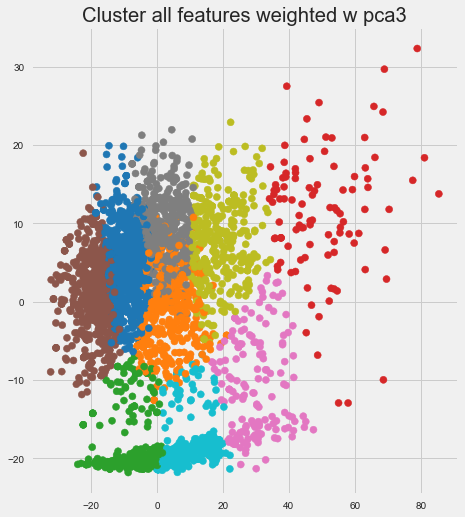

In [868]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster all features weighted w pca3')
plt.scatter(xpca12[:,0], xpca12[:,1], c=y_kmeans, cmap=cmap)

In [869]:
silhouette_score(xpca12, y_kmeans)

0.2777391874583569

In [978]:
xwhatisthis=pd.DataFrame(x)

In [979]:
xwhatisthis.head()

,0,1,2,3,4,5,6,7
0,-5.593891,-0.233216,2.459505,-0.900282,-0.551622,0.569923,0.704495,-0.367355
1,-5.728519,-0.096797,0.022982,-0.000165,0.475168,2.057555,0.711692,-0.597177
2,4.483631,-3.424713,2.044390,0.923177,1.539522,0.218079,-0.529877,-2.194885
3,4.051124,-2.964619,2.184149,1.088124,1.155688,1.207074,0.673385,-0.616122
4,6.805887,1.414458,0.064643,-2.196471,0.441325,-0.305688,0.663664,-2.222444


In [ ]:
# x = X_pca
# silhouette = []

# for n_clusters in range(2, 21):
#     kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
#     cluster_labels = kmeans.fit_predict(x)
    
#     centers = kmeans.cluster_centers_

#     score = silhouette_score(x, cluster_labels)
#     silhouette.append(score)
#     print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [870]:
pca = PCA(n_components = 3)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3'])

pca_df['Player'] = df2['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3']]

In [951]:
pca_df.head()

,Player,PC 1,PC 2,PC 3
0,Álex Abrines,-5.593891,-0.233216,2.459505
1,Jaylen Adams,-5.728519,-0.096797,0.022982
2,Steven Adams,4.483631,-3.424713,2.044390
3,Bam Adebayo,4.051124,-2.964619,2.184149
4,LaMarcus Aldridge,6.805887,1.414458,0.064643


In [897]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfmod2['Player']
df_cluster['Year'] = dfmod2['Year']
df_cluster['Pos'] = dfmod2['Pos']
df_cluster['Cluster'] = y_kmeans


In [894]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', 'FG%', '3P%','3PA','FT%', 'USG%','PER']

def cluster_stats(cluster):
    
    print(dfmod2[interest_stats].loc[df_cluster['Cluster'] == cluster].mean())

In [893]:
dfmod2.columns

Index(['Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'Rk',
       'Age', 'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'Year', 'Pos'],
      dtype='object')

In [873]:
df_cluster['Cluster'].value_counts()

0    935
4    573
6    490
1    444
7    325
2    306
8    277
5    170
3    102
Name: Cluster, dtype: int64

In [800]:
cluster_stats(0)

PTS     19.926573
TRB     14.645455
AST      2.617832
STL      1.419930
BLK      2.059091
FG%      0.528350
3P%      0.028720
FT%      0.677465
USG%    18.202797
PER     16.667483
dtype: float64


In [801]:
cluster_stats(1)

PTS     18.979940
TRB      6.396833
AST      4.093665
STL      1.489442
BLK      0.570136
FG%      0.413306
3P%      0.369107
FT%      0.779383
USG%    17.864857
PER     11.496833
dtype: float64


In [802]:
cluster_stats(2)

PTS     34.396591
TRB     10.598864
AST      8.209091
STL      2.027273
BLK      1.148864
FG%      0.492511
3P%      0.356443
FT%      0.830420
USG%    28.863636
PER     25.813636
dtype: float64


In [803]:
cluster_stats(3)

PTS     14.816949
TRB      6.331073
AST      4.130320
STL      1.546893
BLK      0.619586
FG%      0.387305
3P%      0.311360
FT%      0.722269
USG%    15.966855
PER      8.346328
dtype: float64


In [804]:
cluster_stats(4)

PTS     21.513294
TRB      7.228770
AST      4.410317
STL      1.586706
BLK      0.688889
FG%      0.443147
3P%      0.382873
FT%      0.806970
USG%    19.197222
PER     14.359524
dtype: float64


In [805]:
cluster_stats(5)

PTS     19.396780
TRB      8.095833
AST      5.379167
STL      1.703409
BLK      0.783144
FG%      0.438831
3P%      0.318267
FT%      0.742335
USG%    19.279545
PER     13.081439
dtype: float64


In [806]:
cluster_stats(6)

PTS     24.084865
TRB     15.489189
AST      3.281081
STL      1.456757
BLK      2.181081
FG%      0.553319
3P%      0.095297
FT%      0.684151
USG%    20.949189
PER     20.464324
dtype: float64


In [807]:
cluster_stats(7)

PTS     27.094208
TRB      9.027027
AST      6.339768
STL      1.748263
BLK      0.928571
FG%      0.467440
3P%      0.379305
FT%      0.810259
USG%    23.948649
PER     19.311583
dtype: float64


In [808]:
cluster_stats(8)

PTS     24.017825
TRB     10.049849
AST      5.549547
STL      1.708157
BLK      1.145619
FG%      0.477746
3P%      0.335707
FT%      0.754372
USG%    22.305740
PER     17.287613
dtype: float64


In [809]:
cluster_stats(9)

PTS     13.878947
TRB     12.795547
AST      2.521862
STL      1.374494
BLK      1.853036
FG%      0.484134
3P%      0.024810
FT%      0.617036
USG%    14.376923
PER     11.442510
dtype: float64


In [861]:
df_cluster[df_cluster['Cluster'] == 2]

,Player,Year,Cluster
33,Bradley Beal,2018,2
45,Eric Bledsoe,2018,2
67,Thomas Bryant,2018,2
78,Jimmy Butler,2018,2
79,Jimmy Butler,2018,2
80,Jimmy Butler,2018,2
95,Willie Cauley-Stein,2018,2
108,John Collins,2018,2
111,Mike Conley,2018,2
154,Joel Embiid,2018,2


## EXPLORING clusters for final model selected (9CLUST)

In [983]:
cluster_stats(0)

PTS     19.079144
TRB      6.828128
AST      4.602888
STL      1.569947
BLK      0.595294
2PA      9.834759
FG%      0.420386
3P%      0.353232
3PA      6.853262
FT%      0.768274
USG%    18.369305
PER     11.930588
dtype: float64


In [986]:
df_cluster.head(40)

,Player,Year,Pos,Cluster
0,Álex Abrines,2018,SG,4
1,Jaylen Adams,2018,PG,4
2,Steven Adams,2018,C,5
3,Bam Adebayo,2018,C,5
4,LaMarcus Aldridge,2018,C,5
5,Grayson Allen,2018,SG,4
6,Jarrett Allen,2018,C,5
7,Kadeem Allen,2018,SG,1
8,Al-Farouq Aminu,2018,PF,6
9,Justin Anderson,2018,SF,0


In [989]:
df_cluster.query('Cluster == 0 and Year == 2018').head(40)

,Player,Year,Pos,Cluster
9,Justin Anderson,2018,SF,0
12,OG Anunoby,2018,SF,0
14,Trevor Ariza,2018,SF,0
15,Trevor Ariza,2018,SF,0
16,Trevor Ariza,2018,SF,0
19,Dwayne Bacon,2018,SG,0
21,Lonzo Ball,2018,PG,0
27,Will Barton,2018,SG,0
32,Kent Bazemore,2018,SG,0
35,Marco Belinelli,2018,SG,0


In [982]:
#test
df_cluster[df_cluster['Cluster'] == 0]

,Player,Year,Pos,Cluster
9,Justin Anderson,2018,SF,0
12,OG Anunoby,2018,SF,0
14,Trevor Ariza,2018,SF,0
15,Trevor Ariza,2018,SF,0
16,Trevor Ariza,2018,SF,0
19,Dwayne Bacon,2018,SG,0
21,Lonzo Ball,2018,PG,0
27,Will Barton,2018,SG,0
32,Kent Bazemore,2018,SG,0
35,Marco Belinelli,2018,SG,0


In [984]:
cluster_stats(1)

PTS     22.716892
TRB      9.867568
AST      5.386486
STL      1.717342
BLK      1.115090
2PA     15.244369
FG%      0.469901
3P%      0.324723
3PA      3.566441
FT%      0.743966
USG%    21.500000
PER     16.212613
dtype: float64


In [900]:
df_cluster[df_cluster['Cluster'] == 1]

,Player,Year,Pos,Cluster
7,Kadeem Allen,2018,SG,1
10,Kyle Anderson,2018,SF,1
20,Marvin Bagley,2018,PF,1
22,Mohamed Bamba,2018,C,1
23,J.J. Barea,2018,PG,1
31,Aron Baynes,2018,C,1
71,Trey Burke,2018,PG,1
72,Trey Burke,2018,PG,1
73,Trey Burke,2018,PG,1
92,Wendell Carter,2018,C,1


In [992]:
df_cluster.query('Cluster == 1 and Year == 2018').head(60)

,Player,Year,Pos,Cluster
7,Kadeem Allen,2018,SG,1
10,Kyle Anderson,2018,SF,1
20,Marvin Bagley,2018,PF,1
22,Mohamed Bamba,2018,C,1
23,J.J. Barea,2018,PG,1
31,Aron Baynes,2018,C,1
71,Trey Burke,2018,PG,1
72,Trey Burke,2018,PG,1
73,Trey Burke,2018,PG,1
92,Wendell Carter,2018,C,1


In [901]:
cluster_stats(2)

PTS     14.596078
TRB     12.858824
AST      2.687908
STL      1.388235
BLK      1.800654
2PA     12.184314
FG%      0.487631
3P%      0.038850
3PA      0.287255
FT%      0.628843
USG%    14.908497
PER     11.952288
dtype: float64


In [902]:
df_cluster[df_cluster['Cluster'] == 2]

,Player,Year,Pos,Cluster
36,Jordan Bell,2018,C,2
42,Bismack Biyombo,2018,C,2
96,Tyson Chandler,2018,C,2
97,Tyson Chandler,2018,C,2
98,Tyson Chandler,2018,C,2
137,Hamidou Diallo,2018,SG,2
164,Cristiano Felício,2018,C,2
183,Harry Giles,2018,PF,2
188,Marcin Gortat,2018,C,2
220,Nenê Hilário,2018,C,2


In [903]:
cluster_stats(3)

PTS     34.156863
TRB     10.485294
AST      8.220588
STL      2.032353
BLK      1.140196
2PA     17.298039
FG%      0.487225
3P%      0.356725
3PA      7.206863
FT%      0.827539
USG%    28.951961
PER     25.396078
dtype: float64


In [904]:
df_cluster[df_cluster['Cluster'] == 3]

,Player,Year,Pos,Cluster
11,Giannis Antetokounmpo,2018,PF,3
124,Stephen Curry,2018,PG,3
126,Anthony Davis,2018,C,3
150,Kevin Durant,2018,SF,3
154,Joel Embiid,2018,C,3
181,Paul George,2018,SF,3
185,Rudy Gobert,2018,C,3
204,James Harden,2018,PG,3
244,Kyrie Irving,2018,PG,3
254,LeBron James,2018,SF,3


In [905]:
cluster_stats(4)

PTS     14.950087
TRB      6.369459
AST      4.099127
STL      1.536649
BLK      0.632984
2PA      8.670506
FG%      0.387634
3P%      0.312986
3PA      5.744852
FT%      0.724721
USG%    16.025654
PER      8.437522
dtype: float64


In [994]:
df_cluster.query('Cluster == 4 and Year == 2018').head(60)

,Player,Year,Pos,Cluster
0,Álex Abrines,2018,SG,4
1,Jaylen Adams,2018,PG,4
5,Grayson Allen,2018,SG,4
28,Keita Bates-Diop,2018,SF,4
30,Jerryd Bayless,2018,PG,4
37,DeAndre' Bembry,2018,SG,4
38,Dragan Bender,2018,PF,4
44,Antonio Blakeney,2018,SG,4
46,Jaron Blossomgame,2018,SF,4
51,Avery Bradley,2018,SG,4


In [906]:
df_cluster[df_cluster['Cluster'] == 4]

,Player,Year,Pos,Cluster
0,Álex Abrines,2018,SG,4
1,Jaylen Adams,2018,PG,4
5,Grayson Allen,2018,SG,4
28,Keita Bates-Diop,2018,SF,4
30,Jerryd Bayless,2018,PG,4
37,DeAndre' Bembry,2018,SG,4
38,Dragan Bender,2018,PF,4
44,Antonio Blakeney,2018,SG,4
46,Jaron Blossomgame,2018,SF,4
51,Avery Bradley,2018,SG,4


In [907]:
cluster_stats(5)

PTS     25.455294
TRB     15.320588
AST      3.480000
STL      1.462941
BLK      2.120000
2PA     18.504118
FG%      0.547759
3P%      0.137165
3PA      0.543529
FT%      0.705118
USG%    22.120000
PER     21.124118
dtype: float64


In [996]:
df_cluster.query('Cluster == 5 and Year == 2018').head(60)

,Player,Year,Pos,Cluster
2,Steven Adams,2018,C,5
3,Bam Adebayo,2018,C,5
4,LaMarcus Aldridge,2018,C,5
6,Jarrett Allen,2018,C,5
18,Deandre Ayton,2018,C,5
88,Clint Capela,2018,C,5
135,DeMar DeRozan,2018,SG,5
147,Andre Drummond,2018,C,5
163,Derrick Favors,2018,C,5
206,Montrezl Harrell,2018,C,5


In [908]:
df_cluster[df_cluster['Cluster'] == 5]

,Player,Year,Pos,Cluster
2,Steven Adams,2018,C,5
3,Bam Adebayo,2018,C,5
4,LaMarcus Aldridge,2018,C,5
6,Jarrett Allen,2018,C,5
18,Deandre Ayton,2018,C,5
88,Clint Capela,2018,C,5
135,DeMar DeRozan,2018,SG,5
147,Andre Drummond,2018,C,5
163,Derrick Favors,2018,C,5
206,Montrezl Harrell,2018,C,5


In [909]:
cluster_stats(6)

PTS     21.120000
TRB      7.192245
AST      4.300204
STL      1.575102
BLK      0.661837
2PA      9.573673
FG%      0.440133
3P%      0.384806
3PA      7.846735
FT%      0.805416
USG%    18.880612
PER     14.006122
dtype: float64


In [998]:
df_cluster.query('Cluster == 7 and Year == 2018').head(60)

,Player,Year,Pos,Cluster
17,D.J. Augustin,2018,PG,7
33,Bradley Beal,2018,SG,7
45,Eric Bledsoe,2018,PG,7
48,Bojan Bogdanović,2018,SF,7
50,Devin Booker,2018,SG,7
61,Malcolm Brogdon,2018,SG,7
67,Thomas Bryant,2018,C,7
78,Jimmy Butler,2018,SF-SG,7
79,Jimmy Butler,2018,SG,7
80,Jimmy Butler,2018,SF,7


In [910]:
df_cluster[df_cluster['Cluster'] == 6]

,Player,Year,Pos,Cluster
8,Al-Farouq Aminu,2018,PF,6
13,Ryan Arcidiacono,2018,PG,6
24,Harrison Barnes,2018,PF-SF,6
25,Harrison Barnes,2018,PF,6
26,Harrison Barnes,2018,SF,6
29,Nicolas Batum,2018,SF,6
34,Malik Beasley,2018,SG,6
39,Dāvis Bertāns,2018,PF,6
40,Patrick Beverley,2018,PG,6
43,Nemanja Bjelica,2018,PF,6


In [911]:
cluster_stats(7)

PTS     25.774154
TRB      8.405846
AST      6.141538
STL      1.739385
BLK      0.907692
2PA     13.720308
FG%      0.464637
3P%      0.376837
3PA      6.415077
FT%      0.807769
USG%    22.858462
PER     18.265538
dtype: float64


In [912]:
df_cluster[df_cluster['Cluster'] == 7]

,Player,Year,Pos,Cluster
17,D.J. Augustin,2018,PG,7
33,Bradley Beal,2018,SG,7
45,Eric Bledsoe,2018,PG,7
48,Bojan Bogdanović,2018,SF,7
50,Devin Booker,2018,SG,7
61,Malcolm Brogdon,2018,SG,7
67,Thomas Bryant,2018,C,7
78,Jimmy Butler,2018,SF-SG,7
79,Jimmy Butler,2018,SG,7
80,Jimmy Butler,2018,SF,7


In [913]:
cluster_stats(8)

PTS     20.280866
TRB     14.629964
AST      2.709025
STL      1.411191
BLK      2.083755
2PA     15.522022
FG%      0.533614
3P%      0.026542
3PA      0.120939
FT%      0.673206
USG%    18.326354
PER     17.136101
dtype: float64


In [914]:
df_cluster[df_cluster['Cluster'] == 8]

,Player,Year,Pos,Cluster
41,Khem Birch,2018,C,8
127,Ed Davis,2018,C,8
231,Richaun Holmes,2018,C,8
311,Kevon Looney,2018,C,8
378,Joakim Noah,2018,C,8
379,Nerlens Noel,2018,C,8
386,Jahlil Okafor,2018,C,8
407,Mason Plumlee,2018,C,8
408,Jakob Pöltl,2018,C,8
477,Tristan Thompson,2018,C,8


In [1001]:
df_cluster.query('Cluster == 8 and Year == 2017').head(60)

,Player,Year,Pos,Cluster
520,Bam Adebayo,2017,C,8
551,Jordan Bell,2017,C,8
555,Khem Birch,2017,C,8
595,Willie Cauley-Stein,2017,C,8
625,Deyonta Davis,2017,C,8
626,Ed Davis,2017,C,8
632,Cheick Diallo,2017,PF,8
650,Kenneth Faried,2017,PF,8
675,Marcin Gortat,2017,C,8
701,John Henson,2017,C,8


In [915]:
cluster_stats(0)

PTS     19.079144
TRB      6.828128
AST      4.602888
STL      1.569947
BLK      0.595294
2PA      9.834759
FG%      0.420386
3P%      0.353232
3PA      6.853262
FT%      0.768274
USG%    18.369305
PER     11.930588
dtype: float64


In [ ]:
# trying to understand difference between wings 

In [916]:
cluster_stats(4)

PTS     14.950087
TRB      6.369459
AST      4.099127
STL      1.536649
BLK      0.632984
2PA      8.670506
FG%      0.387634
3P%      0.312986
3PA      5.744852
FT%      0.724721
USG%    16.025654
PER      8.437522
dtype: float64


In [917]:
cluster_stats(6)

PTS     21.120000
TRB      7.192245
AST      4.300204
STL      1.575102
BLK      0.661837
2PA      9.573673
FG%      0.440133
3P%      0.384806
3PA      7.846735
FT%      0.805416
USG%    18.880612
PER     14.006122
dtype: float64


In [ ]:
# trying to understand difference between bigs 

In [918]:
cluster_stats(2)

PTS     14.596078
TRB     12.858824
AST      2.687908
STL      1.388235
BLK      1.800654
2PA     12.184314
FG%      0.487631
3P%      0.038850
3PA      0.287255
FT%      0.628843
USG%    14.908497
PER     11.952288
dtype: float64


In [919]:
cluster_stats(5)

PTS     25.455294
TRB     15.320588
AST      3.480000
STL      1.462941
BLK      2.120000
2PA     18.504118
FG%      0.547759
3P%      0.137165
3PA      0.543529
FT%      0.705118
USG%    22.120000
PER     21.124118
dtype: float64


In [920]:
cluster_stats(8)

PTS     20.280866
TRB     14.629964
AST      2.709025
STL      1.411191
BLK      2.083755
2PA     15.522022
FG%      0.533614
3P%      0.026542
3PA      0.120939
FT%      0.673206
USG%    18.326354
PER     17.136101
dtype: float64


### Assigning NAMES for clusters

In [921]:
# now assign names to clusters ... 

In [927]:
dfmaster.columns

Index(['Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'Age',
       'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'Year', 'Pos'],
      dtype='object')

In [928]:
stats=['Player', 'DRtg', 'Season', 'ORtg', 'USG%', 'VORP', 'WS', 'PER', 'Age',
       'Tm', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'Year', 'Pos']

In [924]:
df.head()

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [925]:
dfdropped.head()

,DRtg,ORtg,USG%,VORP,WS,PER,Rk,FG,FGA,2P,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,111,103.0,12.2,-0.2,0.6,6.3,1.0,4.4,12.5,1.2,...,0.5,1.1,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507
1,115,99.0,13.5,-0.3,0.1,7.6,3.0,4.1,11.9,1.4,...,0.5,3.0,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474
2,106,120.0,16.4,3.2,9.1,18.5,4.0,8.4,14.1,8.4,...,1.3,2.4,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591
3,104,120.0,15.8,2.4,6.8,17.9,5.0,7.2,12.4,7.1,...,1.7,3.1,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623
4,110,117.0,26.9,2.5,9.3,22.9,8.0,12.4,24.0,12.3,...,1.9,2.6,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576


In [926]:
dfmaster = df.drop(['Unnamed: 0','Rk'], axis=1)

In [941]:
dfmaster2=dfmaster[dfmaster.Year > 2010]

In [940]:
len(dfmaster)

8469

In [ ]:
#need to make greater than 2011...

In [942]:
len(dfmaster2)

3622

In [ ]:
# interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', 'FG%', '3P%','3PA','FT%', 'USG%','PER']

In [958]:
dfmaster2.head()

,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Age,Tm,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,25.0,OKC,...,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,22.0,ATL,...,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,25.0,OKC,...,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,21.0,MIA,...,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,33.0,SAS,...,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C


In [944]:
df_cluster3= dfmaster2[stats]

In [959]:
df_cluster4=dfmaster2[stats]

In [945]:
df_cluster3['Cluster']=df_cluster['Cluster']+1

In [960]:
df_cluster4['Cluster']=df_cluster['Cluster']+1

In [946]:
df_cluster3.head()

,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Age,Tm,...,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos,Cluster
0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,25.0,OKC,...,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG,5
1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,22.0,ATL,...,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG,5
2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,25.0,OKC,...,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C,6
3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,21.0,MIA,...,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C,6
4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,33.0,SAS,...,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C,6


In [961]:
df_cluster4.head()

,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Age,Tm,...,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos,Cluster
0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,25.0,OKC,...,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG,5
1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,22.0,ATL,...,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG,5
2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,25.0,OKC,...,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C,6
3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,21.0,MIA,...,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C,6
4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,33.0,SAS,...,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C,6


In [934]:
#messed up should be upto 10 not 9 so will run again for df_cluster4
roles = ['3&D', 'Do It All', 'Backup Inside Big', 'Superstar', 'Perimeter Scorer', 'Star Inside Big', 'Elite Wing',
         'All Star', 'Elite Inside Big']

cluster_dict = dict(zip(list(range(1, 9)), roles))

In [962]:
roles = ['3&D', 'Do It All', 'Backup Inside Big', 'Superstar', 'Perimeter Scorer', 'Star Inside Big', 'Elite Wing',
         'All Star', 'Elite Inside Big']

cluster_dict = dict(zip(list(range(1, 10)), roles))

In [947]:
df_cluster3['Role'] = df_cluster3['Cluster'].map(cluster_dict)

In [963]:
df_cluster4['Role'] = df_cluster4['Cluster'].map(cluster_dict)

In [948]:
df_cluster3.head()

,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Age,Tm,...,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos,Cluster,Role
0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,25.0,OKC,...,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG,5,Perimeter Scorer
1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,22.0,ATL,...,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG,5,Perimeter Scorer
2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,25.0,OKC,...,0.595,0.596,0.000,0.595,0.500,0.591,2018,C,6,Star Inside Big
3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,21.0,MIA,...,0.576,0.588,0.200,0.579,0.735,0.623,2018,C,6,Star Inside Big
4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,33.0,SAS,...,0.519,0.528,0.238,0.522,0.847,0.576,2018,C,6,Star Inside Big


In [964]:
len(df_cluster4)

3622

In [949]:
len(df_cluster3)

3622

In [965]:
df_cluster4.isnull().sum()

Player     0
DRtg       0
Season     0
ORtg       0
USG%       0
VORP       0
WS         0
PER        0
Age        0
Tm         0
Lg         0
G          0
GS         0
MP         0
FG         0
FGA        0
2P         0
2PA        0
3P         0
3PA        0
FT         0
FTA        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
FG%        0
2P%        0
3P%        0
eFG%       0
FT%        0
TS%        0
Year       0
Pos        0
Cluster    0
Role       0
dtype: int64

### checkpt10

In [950]:
df_cluster3.to_csv('realfinalclusterdata.csv', index=False)

In [966]:
df_cluster4.to_csv('newcorrectfinaldatalastlast.csv', index=False)

In [938]:
df_avg = df_cluster2.groupby('Role')[interest_stats].mean()

In [939]:
df_avg.head()

,PTS,TRB,AST,STL,BLK,2PA,FG%,3P%,3PA,FT%,USG%,PER
Role,,,,,,,,,,,,
3&D,19.079144,6.828128,4.602888,1.569947,0.595294,9.834759,0.420386,0.353232,6.853262,0.768274,18.369305,11.930588
All Star,25.774154,8.405846,6.141538,1.739385,0.907692,13.720308,0.464637,0.376837,6.415077,0.807769,22.858462,18.265538
Backup Inside Big,14.596078,12.858824,2.687908,1.388235,1.800654,12.184314,0.487631,0.038850,0.287255,0.628843,14.908497,11.952288
Do It All,22.716892,9.867568,5.386486,1.717342,1.115090,15.244369,0.469901,0.324723,3.566441,0.743966,21.500000,16.212613
Elite Wing,21.120000,7.192245,4.300204,1.575102,0.661837,9.573673,0.440133,0.384806,7.846735,0.805416,18.880612,14.006122


### END

In [952]:
df_cluster3['PC1'] = pca_df['PC 1']

In [954]:
df_cluster3['PC2'] = pca_df['PC 2']

In [955]:
df_cluster3['PC3'] = pca_df['PC 3']

In [956]:
df_clusterPCA=df_cluster3

In [ ]:
df_cluster['Player'] = dfmod2['Player']

In [ ]:
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3']]

In [957]:
df_clusterPCA.to_csv('PCAdata.csv', index=False)

### df_cluster4

In [972]:
df_cluster6pca=df_cluster4

In [973]:
df_cluster6pca['PC1'] = pca_df['PC 1']

In [974]:
df_cluster6pca['PC2'] = pca_df['PC 2']

In [975]:
df_cluster6pca['PC3'] = pca_df['PC 3']

In [976]:
df_cluster6pca.to_csv('PCAdata6.csv', index=False)

In [ ]:
#df[df['player'] == 'Kevin Durant']